<a href="https://colab.research.google.com/github/chrdrn/digital-behavior-data-binder/blob/main/session_05-showcase_youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IMG SRC="https://raw.githubusercontent.com/chrdrn/digital-behavioral-data/main/img/dbd_hex.png" WIDTH=15% HEIGHT=15% ALIGN="left" HSPACE="10" VSPACE="10" /> 
<h1>Disclaimer </h1>
<p>For reasons of research ethics and out of respect for privacy the data collected and processed in the course will be managed in a private OSF repository. Students will only have access to this OSF repository for a limited period of time. </p>
<p>Although the collection of data is (at least) partially documented in the showcases, detailed instructions can be found in the slides of course for the respective session. </p>
<p> Link: <a href="https://chrdrn.github.io/digital-behavioral-data/">https://chrdrn.github.io/digital-behavioral-data/</a>
</p>

<BR CLEAR=”left” />

---
### <img src="https://icons.getbootstrap.com/assets/icons/info-circle-fill.svg" width="15" height="15"> Technical note

While the chunk outputs were saved, the data basis was not. For an error-free execution of this notebook, the data must be collected and reloaded. All chunks for which the path to the data must be re-entered are marked with the following symobl: <img src="https://icons.getbootstrap.com/assets/icons/database-fill-down.svg" width="15" height="15">

---

# Background
Practical application of the [YouTube Data Tool (YTDT)](https://tools.digitalmethods.net/netvizz/youtube/) using the example of Mai Thi Nguyen-Kim ( [<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/twitter.svg" width="15" height="15">](https://twitter.com/maithi_nk) | [<img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/instagram.svg" width="15" height="15">](https://twitter.com/maithi_nk) ) and her <img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/youtube.svg" width="15" height="15"> Channel [maiLab](https://www.youtube.com/c/maiLab).

## Preparation

Install addtional necessary packages

⚠ It might take a few minutes to install all packages and dependencies



In [ ]:
install.packages(c("sjmisc","sjPlot"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘xtable’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘emmeans’, ‘lme4’, ‘insight’, ‘sjlabelled’, ‘bayestestR’, ‘datawizard’, ‘effectsize’, ‘ggeffects’, ‘parameters’, ‘performance’, ‘sjstats’




# <img src="https://icons.getbootstrap.com/assets/icons/database-fill-down.svg" width="20" height="20"> Excercise 1

* Use the [`Channel Search`](https://tools.digitalmethods.net/netvizz/youtube/mod_channels_search.php) site/function of the `YTDT` to find the (correct) `channel ID` for the <img src="https://raw.githubusercontent.com/FortAwesome/Font-Awesome/6.x/svgs/brands/youtube.svg" width="15" height="15"> Channel [maiLab](https://www.youtube.com/c/maiLab). 
* Therefore, enter "*maiLab*" in the field `Search query` and download the results as `.csv`. 
* Open the file and search extract the correct channel ID.\
  *Hint:*  If in doubt, use [`Channel Info`](https://tools.digitalmethods.net/netvizz/youtube/mod_channel_info.php) function to check if the selected ID matches the channel description.

In [ ]:
# Load packages
library(readr)
library(tidyverse)

# Import data
channel_list <- read_csv(ADD_DATA_PATH_HERE)

# Preview data 
channel_list %>% glimpse()

Rows: 50 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): id, title, description, defaultLanguage, country
dbl  (4): position, viewCount, subscriberCount, videoCount
dttm (1): publishedAt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 50
Columns: 10
$ position        <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,…
$ id              <chr> "UCyHDQ5C6z1NDmJ4g6SerW8g", "UC146qqkUMTrn4nfSSOTNwiA"…
$ title           <chr> "maiLab", "musstewissen Chemie", "mailab", "MAILab_메…
$ description     <chr> "Holt euch einen Tee, Freunde der Sonne, macht es euch…
$ publishedAt     <dttm> 2016-09-08 14:13:08, 2016-09-23 09:24:14, 2020-03-19 …
$ defaultLanguage <chr> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA…
$ country         <chr> "DE", "DE", "DE", "KR", NA, NA, NA, NA, NA, "DE", NA, …
$ viewCount       <dbl> 127882489, 18039348, 21013, 5101, 11, 2, 2, 5004, 230,…
$ subscriberCount <dbl> 1480000, 190000, 146, 26, 0, 1, 1, 9, 9, 66300, 0, 2, …
$ videoCount      <dbl> 186, 45, 9, 104, 3, 1, 1, 24, 12, 51, 1, 6, 31, 1, 2, …


In [ ]:
# Get channel description with R
channel_list %>%
  filter(title == "maiLab") %>%
  select(id, title, description)

id,title,description
<chr>,<chr>,<chr>
UCyHDQ5C6z1NDmJ4g6SerW8g,maiLab,"Holt euch einen Tee, Freunde der Sonne, macht es euch gemütlich - Zeit für Science! Während viele Medien vereinfachen und zuspitzen, kämmen wir wissenschaftliche Studien bis ins kleinste Detail durch und liefern euch verlässliche, differenzierte Infos, die man nicht so einfach ergoogeln kann. maiLab wird produziert von Mai Thi Nguyen-Kim für funk Impressum: maiLab (früher schönschlau) ist ein Angebot von funk. funk ist ein Gemeinschaftsangebot der Arbeitsgemeinschaft der Rundfunkanstalten der Bundesrepublik Deutschland (ARD) und des Zweiten Deutschen Fernsehens (ZDF). http://go.funk.net/impressum funk hat auf die datenschutzrechtlichen Bestimmungen dieser Plattform sowie die Erhebung, Analyse und Nutzung von Userdaten keinen Einfluss. Im Rahmen unserer Möglichkeiten gehen wir mit der größten Sensibilität mit Deinen Daten um. Weitere Informationen zum Thema Datenschutz findest Du auf unserer Website: https://www.funk.net/datenschutz"


# <img src="https://icons.getbootstrap.com/assets/icons/database-fill-down.svg" width="20" height="20"> Exercise 2


*    With help of the [`Video List`](https://tools.digitalmethods.net/netvizz/youtube/mod_videos_list.php) site/function of the `YTDT`, get a list of all published videos of the channel `maiLab`.  
*   Therefore, use the extracted `channel id` and download the results as `.csv`.
* Import and preview the data. 



In [ ]:
# Import data: video list
video_list <- read_csv(ADD_DATA_PATH_HERE)

# Preview data 
video_list %>% glimpse()

Rows: 186 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): channelId, channelTitle, videoId, videoTitle, videoDescription, t...
dbl   (9): position, videoCategoryId, durationSec, dimension, licensedConten...
lgl   (2): caption, dislikeCount
dttm  (2): publishedAt, publishedAtSQL

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 186
Columns: 23
$ position           <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, …
$ channelId          <chr> "UCyHDQ5C6z1NDmJ4g6SerW8g", "UCyHDQ5C6z1NDmJ4g6SerW…
$ channelTitle       <chr> "maiLab", "maiLab", "maiLab", "maiLab", "maiLab", "…
$ videoId            <chr> "IK5BZdnqMDU", "Mt50U4_ueR0", "-NMs56pQ9EE", "-9OvN…
$ publishedAt        <dttm> 2022-09-18 16:00:18, 2022-06-09 04:30:04, 2022-05-…
$ publishedAtSQL     <dttm> 2022-09-18 16:00:18, 2022-06-09 04:30:04, 2022-05-…
$ videoTitle         <chr> "Das Ende der Homöopathie | MAITHINK X", "Affenpock…
$ videoDescription   <chr> "Der vielleicht größte Abwasserskandal aller Zeiten…
$ tags               <chr> "Mai Thi Nguyen-Kim,Mai Thi,mai,nguyen,mailab,lab,m…
$ videoCategoryId    <dbl> 28, 28, 28, 28, 22, 28, 22, 22, 22, 27, 22, 22, 28,…
$ videoCategoryLabel <chr> "Science & Technology", "Science & Technology", "Sc…
$ duration           <chr> "PT31M57S", "PT13M39S", "PT15M21S", "PT12M6S", "PT1…
$ durationSec     

# Excercise 3

*   Perform an explorative data analysis

## Video uploads over time

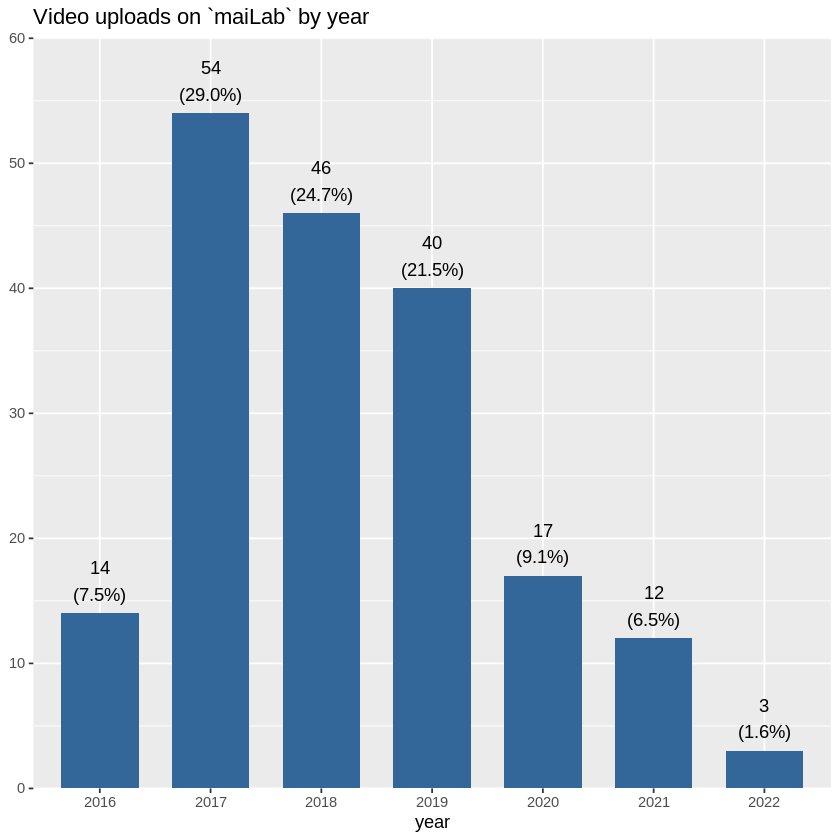

In [ ]:
# Load additional packages
library(lubridate)
library(sjPlot)

# Display 
video_list %>% 
  mutate(year  = as.factor(year(publishedAt))) %>% 
  plot_frq(
    year,
    title = "Video uploads on `maiLab` by year")

## Different location parameters



### Basic descriptive statistics

In [ ]:
# Load additional packages
library(sjmisc) 

# Get distribution parameters for selected variables
video_list %>% 
  select(durationSec, viewCount, likeCount, favoriteCount, commentCount) %>% 
  descr()  


Attaching package: ‘sjmisc’


The following object is masked from ‘package:purrr’:

    is_empty


The following object is masked from ‘package:tidyr’:

    replace_na


The following object is masked from ‘package:tibble’:

    add_case




,var,type,label,n,NA.prc,mean,sd,se,md,trimmed,range,iqr,skew
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2,durationSec,numeric,durationSec,186,0,612.9247,402.7393,29.53028,530.5,579.42,1825 (92-1917),633.25,0.6365699
5,viewCount,numeric,viewCount,186,0,687563.7258,763588.1548,55988.99998,467371.5,562670.19,6671382 (21298-6692680),782761.75,3.3638016
4,likeCount,numeric,likeCount,186,0,31172.5000,36815.4041,2699.43640,20970.5,24734.81,267376 (1063-268439),37023.75,3.1043430
3,favoriteCount,numeric,favoriteCount,186,0,0.0000,0.0000,0.00000,0.0,0.00,0 (0-0),0.00,NaN
1,commentCount,numeric,commentCount,186,0,5598.2796,11238.7658,824.06629,2068.0,3106.24,111166 (34-111200),5718.00,5.5413995


### More detailed distribution for each variable

Warning message:
“`stat(density)` was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.
ℹ The deprecated feature was likely used in the sjPlot package.
  Please report the issue at <https://github.com/strengejacke/sjPlot/issues>.”


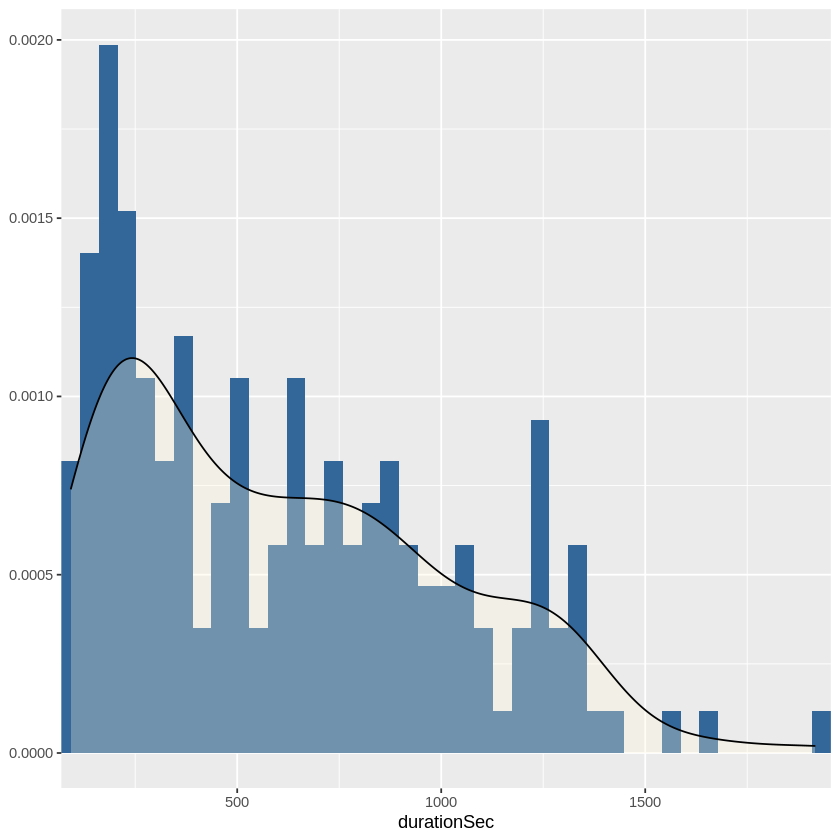

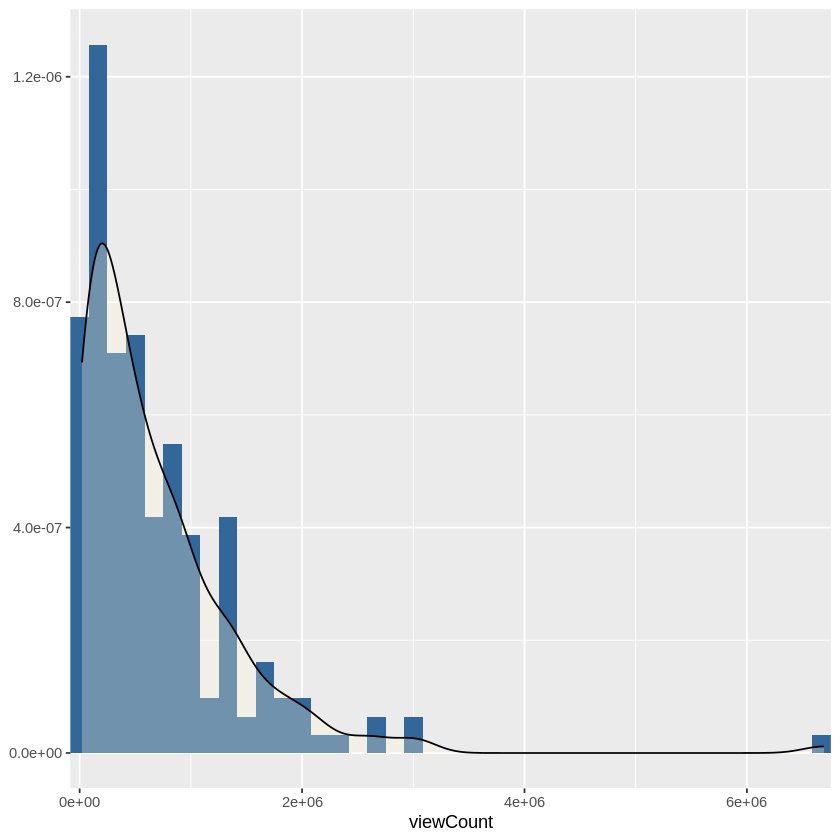

[[1]]

[[2]]

[[3]]

[[4]]


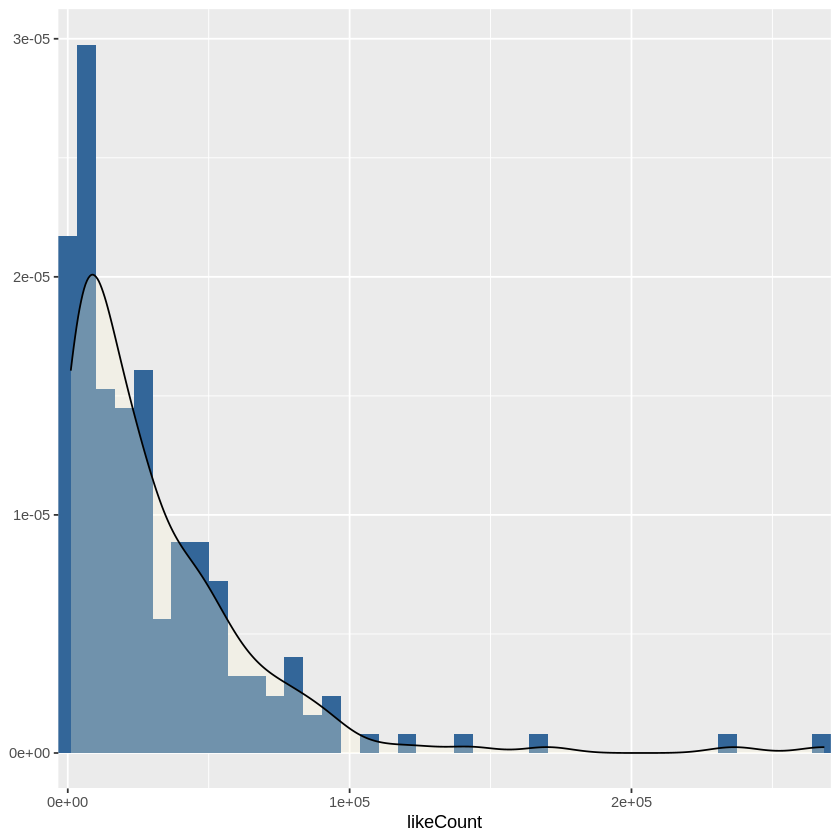

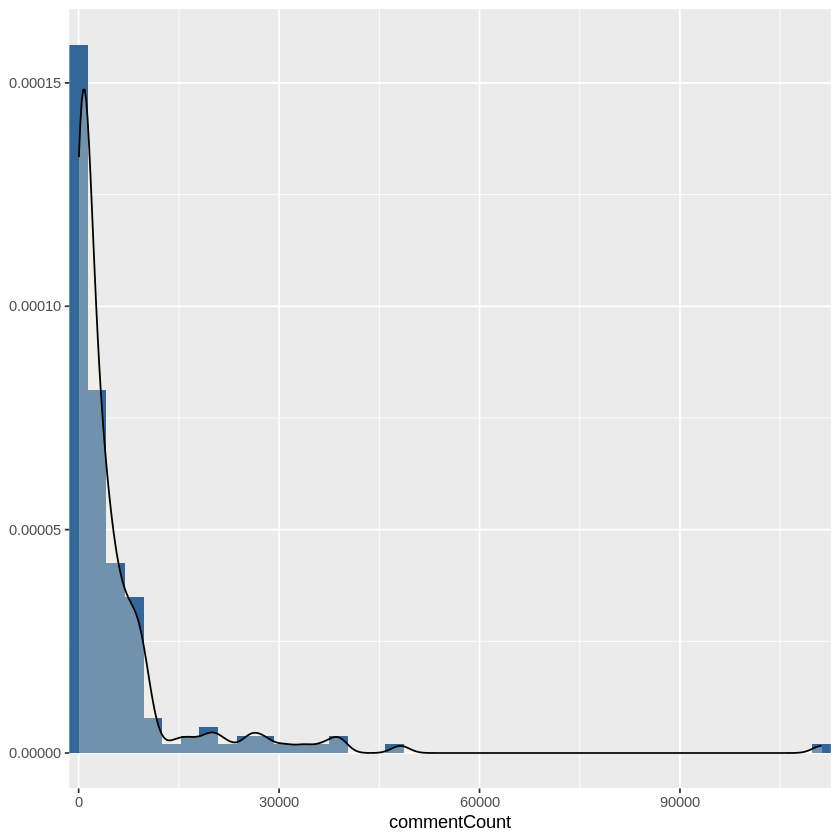

In [ ]:
video_list %>% 
  plot_frq(durationSec, viewCount, likeCount, commentCount, type = "density")

## In-depth analysis
Based on the findings of the previous section, let us take a closer look. Interestingly, although most of the varialbes have a left-sloping distribution, there are isolated outliers on the "right" edge. 

Therefore, the next goal is to find out which video(s) they are.  

### Top 5 videos with the **highest view count**

In [ ]:
video_list %>% 
  arrange(-viewCount) %>% 
  select(videoTitle, publishedAt, viewCount:commentCount) %>% 
  head()

videoTitle,publishedAt,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
<chr>,<dttm>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>
Corona geht gerade erst los,2020-04-02 07:00:00,6692680,268439,NA,0,48174
Impfpflicht ist OK,2021-11-14 07:00:11,3021542,236388,NA,0,111200
So endet Corona,2021-01-28 06:15:04,3020999,170219,NA,0,28363
Virologen-Vergleich,2020-04-19 07:00:22,2654200,92957,NA,0,33773
Rezo wissenschaftlich geprüft,2019-05-24 04:30:25,2605822,142990,NA,0,16995
Was ist jetzt mit dem Kokosöl?,2018-08-30 04:30:01,2362469,63198,NA,0,6833


### Top 5 videos with the **highest comment count**

In [ ]:
video_list %>% 
  arrange(-commentCount) %>% 
  select(videoTitle, publishedAt, viewCount:commentCount) %>% 
  head()

videoTitle,publishedAt,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
<chr>,<dttm>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>
Impfpflicht ist OK,2021-11-14 07:00:11,3021542,236388,NA,0,111200
Corona geht gerade erst los,2020-04-02 07:00:00,6692680,268439,NA,0,48174
7 kritische Fragen zur Impfung,2021-02-11 06:15:02,2068956,80075,NA,0,38982
Corona-Endlosschleife | Kommen wir da jemals wieder raus?,2021-11-25 07:48:24,2125579,123191,NA,0,38823
Corona hat meine Meinung geändert,2020-10-08 04:30:01,1602957,74811,NA,0,36543
Virologen-Vergleich,2020-04-19 07:00:22,2654200,92957,NA,0,33773
